## import libararies

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import imutils

In [2]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img
    


In [66]:
#path = ['G:\\Documents\\Final Dataset _project\\DRHAGIS\\Fundus_Images']
path = ['E:\\fruit']
path2 = ['E:\\Copy_fruits'] #list

images = []
#labels = []
for n,i in enumerate(path):
    for j in tqdm(os.listdir(i)):
        print(j)
        img_path = os.path.join(i,j)
        img = cv2.imread(img_path)
        img = crop_image_from_gray(img,tol=7)
        #img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.resize(img, (224,224))
        cv2.imwrite(os.path.join(path2[0],j), img)
        images.append(img)
        #labels.append(n)
images = np.array(images)/255

#labels = np.array(labels)

100%|██████████| 8/8 [00:00<00:00, 97.62it/s]

download (1).jpg
download (2).jpg
download (3).jpg
download.jpg
images (1).jpg
images (2).jpg
images (3).jpg
images.jpg


IndexError: list index out of range

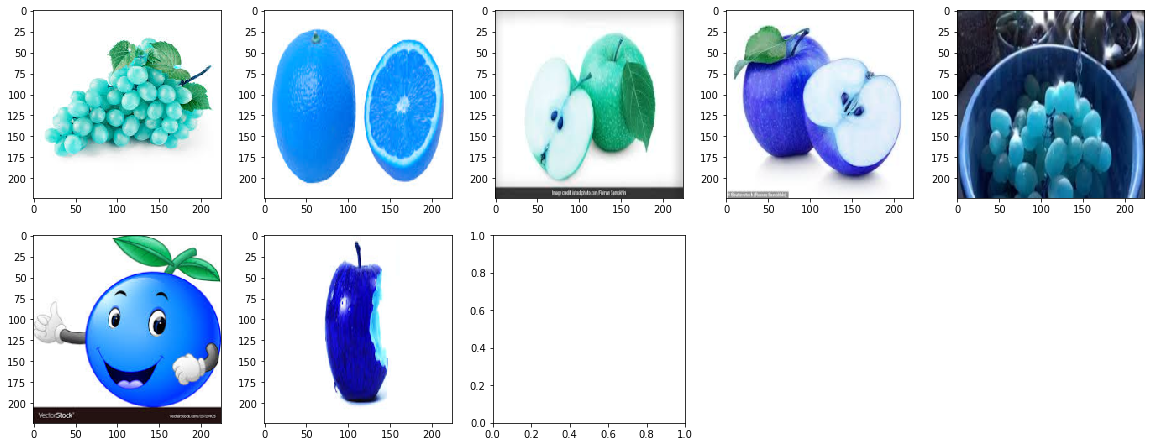

In [64]:
plt.figure(figsize=(20,20))
for i in range(1,16):
    plt.subplot(5,5,i)
    #n = np.random.randint(15)
    #print(n)
    #print(dir(images[i]))
    #plt.title()
    plt.imshow(images[i])
   

    #plt.title(labels[n])

In [ ]:
#path = ['G:\\Documents\\Final Dataset _project\\DRHAGIS\\Fundus_Images']
path = ['E:\\fruit']


images = []
#labels = []
for n,i in enumerate(path):
    for j in tqdm(os.listdir(i)):
        img_path = os.path.join(i,j)
        img = cv2.imread(img_path)
        img = crop_image_from_gray(img,tol=7)
        img = cv2.resize(img, (224,224))
        images.append(img)
        #labels.append(n)
images = np.array(images)/255
#labels = np.array(labels)

In [ ]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    plt.subplot(5,5,i)
    n = np.random.randint(6)
    plt.imshow(images[n])
    #plt.title(labels[n])
  


In [42]:
pip install imutils


  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25856 sha256=4d6d4a10bc3e2485d39912f524ae5c99633cc6575ccfbbf1687daf6dc0d8b0d5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fc\9c\6d\1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils


In [2]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import matplotlib.pyplot as plt
import imutils

In [69]:
def load_data(dir_path):
    X = []
    for file in tqdm((os.listdir(dir_path))):
        if not file.startswith('.'):
            img = cv2.imread(dir_path + '\\' + file)
            X.append(img)
    X = np.array(X)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X

## Sharpen image with Pillow

In [128]:

from PIL import Image
from PIL import ImageFilter

# Open an already existing image
imageObject = Image.open('E:\\Blur\\1img.jpg');
imageObject.show();

# Apply sharp filter
sharpened1 = imageObject.filter(ImageFilter.SHARPEN);
sharpened2 = sharpened1.filter(ImageFilter.SHARPEN);

# Show the sharpened images
sharpened1.show();
sharpened2.show();

In [ ]:
c=plt.imshow(sharpened2)

In [87]:
type(imageObject)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=299x168 at 0x1B83EE7A2C8>


## Read image in folder

In [62]:
import os
directory = "E:\\Blur"
#Save = "E:\\Sharp"

for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        #print(os.path.join(directory, filename))
        continue
    else:
        continue

1img.jpg
2img.jpg
3img.jpg
4img.jpg
5img.jpg


## Log tranformation on image

In [136]:
# Compute log
import math

def logTransform(c, f):

    g = c * math.log(float(1 + f),10);

    return g;

 

# Apply logarithmic transformation for an image  

def logTransformImage(image, outputMax = 255, inputMax=255):

    c = outputMax/math.log(inputMax+1,10);

   

    # Read pixels and apply logarithmic transformation

    for i in range(0, img.size[0]-1):

        for j in range(0, img.size[1]-1):

            # Get pixel value at (x,y) position of the image

            f = img.getpixel((i,j));

           

            # Do log transformation of the pixel

            redPixel    = round(logTransform(c, f[0]));

            greenPixel  = round(logTransform(c, f[1]));

            bluePixel   = round(logTransform(c, f[2]));

 

            # Modify the image with the transformed pixel values

            img.putpixel((i,j),(redPixel, greenPixel, bluePixel));

 

    return image;


In [152]:
import shutil
import os

from PIL import Image
from PIL import ImageFilter

source = "E:\\Glacoma\\"
dest1 = "E:\\Sharp\\"
dest2 = "E:\\log\\"

for filename in os.listdir(source):
    if filename.endswith(".JPG"):
        Path_image=os.path.join(source, filename)
        print(Path_image)
        img = Image.open(Path_image)
        img = img.resize((300,300))
        #Sharp_image=img.filter(ImageFilter.SHARPEN)
        #Sharp_image2=Sharp_image.filter(ImageFilter.SHARPEN)
        #Sharp_image2.save(dest1+filename)
        #logTransformedImage = logTransformImage(img, outputMax = 227)
        dgeEnahnced = img.filter(ImageFilter.EDGE_ENHANCE)
       # imageWithEdges = img.filter(ImageFilter.FIND_EDGES)
        dgeEnahnced.save(dest2+filename)
        

E:\Glacoma\1ffa94a0-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94a1-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94a2-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94a3-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94a5-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94a6-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94a7-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94a8-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94a9-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94ad-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94af-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94b0-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94b1-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94b2-8d87-11e8-9daf-6045cb817f5b..JPG
E:\Glacoma\1ffa94b3-8d87-11e8-9daf-6045cb817f5b..JPG


## cv2 sharpen image

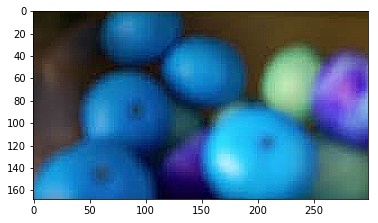

In [125]:
# Create kernel
image = cv2.imread('E:\\Blur\\1img.jpg')
kernel = np.array([[0, -1, 0], 
                   [-1, 5,-1], 
                   [0, -1, 0]])

# Sharpen image
image_sharp = cv2.filter2D(image,-1, kernel)
plt.imshow(image_sharp)

In [99]:
print(Path_image)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=299x168 at 0x1B83EB67188>


## Shutil

In [51]:
#shutil.move will shift all file deom folder to another, leaving source file blank
#shutil.copy will copy the file into another folder. It takes (source+f)i.e (source path + image) with dest1(location where to store)
import shutil
import os

source = "E:\\Blur\\"
dest1 = "E:\\Sharp\\"

files = os.listdir(source)

for f in files:
    #shutil.move(source+f, dest1)
    shutil.copy(source+f, dest1)  
